## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
#boombikes=pd.read_csv(r"C:\Users\ashek\OneDrive\Desktop\IIITB-upGrad\Course-2\Assignment-Linear Regression\day.csv", sep=',')#
boombikes=pd.read_csv("bikesharing.csv")
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
boombikes.shape

(730, 16)

In [4]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#dropping columns for instant,dteday,temp, casual, registered
boombikes=boombikes.drop('instant',axis=1)
boombikes=boombikes.drop('dteday',axis=1)
boombikes=boombikes.drop('temp',axis=1)
boombikes=boombikes.drop('casual',axis=1)
boombikes=boombikes.drop('registered',axis=1)

In [7]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


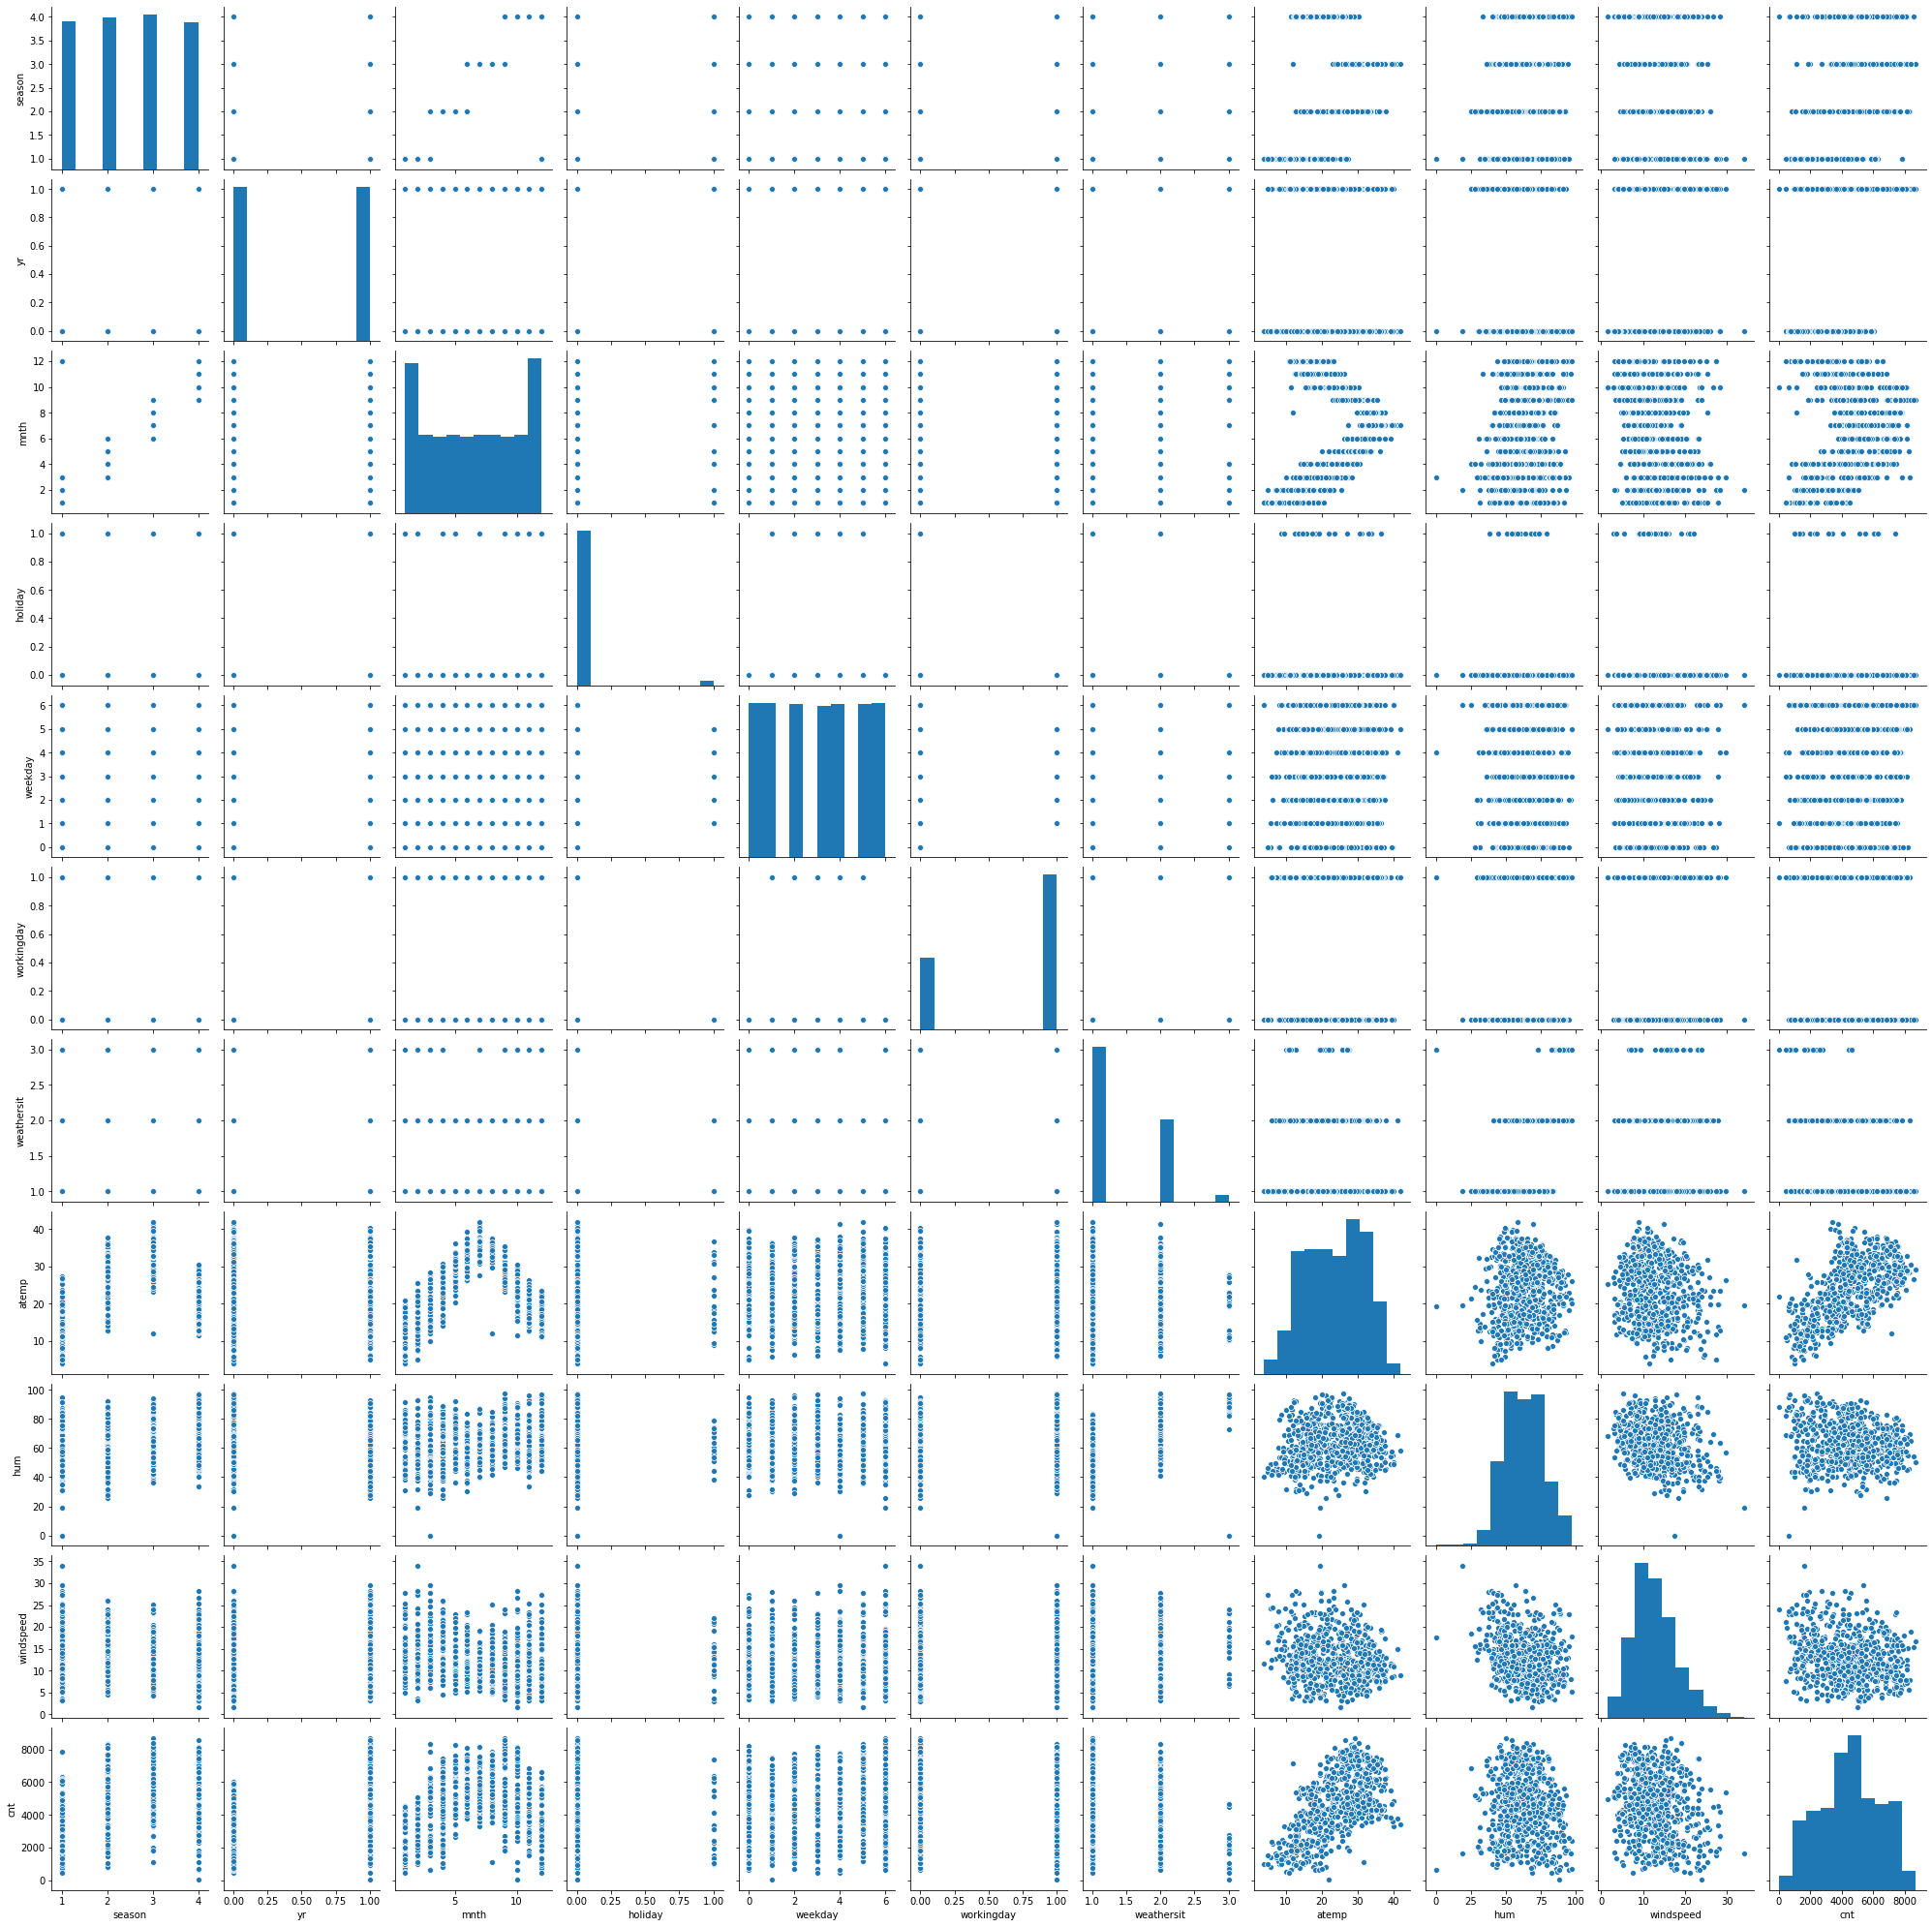

In [8]:
#visualizing all numeric variables
sns.pairplot(boombikes)
plt.show()

## Step2: Data Preparation
    2.1Converting categorical variables to dummy vars

In [9]:
#mapping categorical variables with values to use them later to dummify the column variables
season_replace={'season':{1: 'spring', 2: 'summer', 3:'fall', 4:'winter'}}
boombikes.replace(season_replace,inplace=True)

mnth_replace={'mnth':{1: 'jan', 2: 'feb', 3:'march', 4:'april', 5:'may', 6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}}
boombikes.replace(mnth_replace,inplace=True)

weekday_replace={'weekday':{0: 'sunday', 1: 'monday', 2:'tuesday', 3:'wednesday',4:'thursday',5:'friday',6:'saturday'}}
boombikes.replace(weekday_replace,inplace=True)

weathersit_replace={'weathersit':{1: 'clear', 2: 'misty', 3:'light_drizzle', 4:'heavy_pour'}}
boombikes.replace(weathersit_replace,inplace=True)

boombikes.head()
#boombikes.info()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,saturday,0,misty,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sunday,0,misty,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,monday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tuesday,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wednesday,1,clear,11.46350,43.6957,12.522300,1600


In [10]:
# creating dummy variables for season, mnth, weekday, & weathersit. Next drop the redundant dummy variables
dummy_season=pd.get_dummies(boombikes['season'],drop_first=True)
dummy_mnth=pd.get_dummies(boombikes['mnth'],drop_first=True)
dummy_weekday=pd.get_dummies(boombikes['weekday'],drop_first=True)
dummy_weathersit=pd.get_dummies(boombikes['weathersit'],drop_first=True)

#concat the dummy dataframe with base data
boombikes=pd.concat([boombikes,dummy_season],axis=1)
boombikes=pd.concat([boombikes,dummy_mnth],axis=1)
boombikes=pd.concat([boombikes,dummy_weekday],axis=1)
boombikes=pd.concat([boombikes,dummy_weathersit],axis=1)
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   atemp          730 non-null    float64
 8   hum            730 non-null    float64
 9   windspeed      730 non-null    float64
 10  cnt            730 non-null    int64  
 11  spring         730 non-null    uint8  
 12  summer         730 non-null    uint8  
 13  winter         730 non-null    uint8  
 14  aug            730 non-null    uint8  
 15  dec            730 non-null    uint8  
 16  feb            730 non-null    uint8  
 17  jan            730 non-null    uint8  
 18  july      

In [11]:
# dropping the initial categorical variable
boombikes=boombikes.drop('season',axis=1)
boombikes=boombikes.drop('mnth',axis=1)
boombikes=boombikes.drop('weekday',axis=1)
boombikes=boombikes.drop('weathersit',axis=1)
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   atemp          730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   spring         730 non-null    uint8  
 8   summer         730 non-null    uint8  
 9   winter         730 non-null    uint8  
 10  aug            730 non-null    uint8  
 11  dec            730 non-null    uint8  
 12  feb            730 non-null    uint8  
 13  jan            730 non-null    uint8  
 14  july           730 non-null    uint8  
 15  june           730 non-null    uint8  
 16  march          730 non-null    uint8  
 17  may            730 non-null    uint8  
 18  nov       

In [12]:
boombikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_drizzle,misty
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step2: Data Preparation
    2.2 Splitting into train and test datasets
    2.3 Rescaling of variables

### 2.2 Splitting base data into train and test datasets


In [13]:
df_train,df_test=train_test_split(boombikes,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### 2.3 Rescaling of variables

In [14]:
## Rescaling method used here: MinMax Scaling (normalisation) to compress the variable data between 0 and 1

#Instantiate an object
scaler=MinMaxScaler()
# Create a list of numeric vars
num_vars=['atemp','hum','windspeed','cnt']
# Fit the scale on the data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_drizzle,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


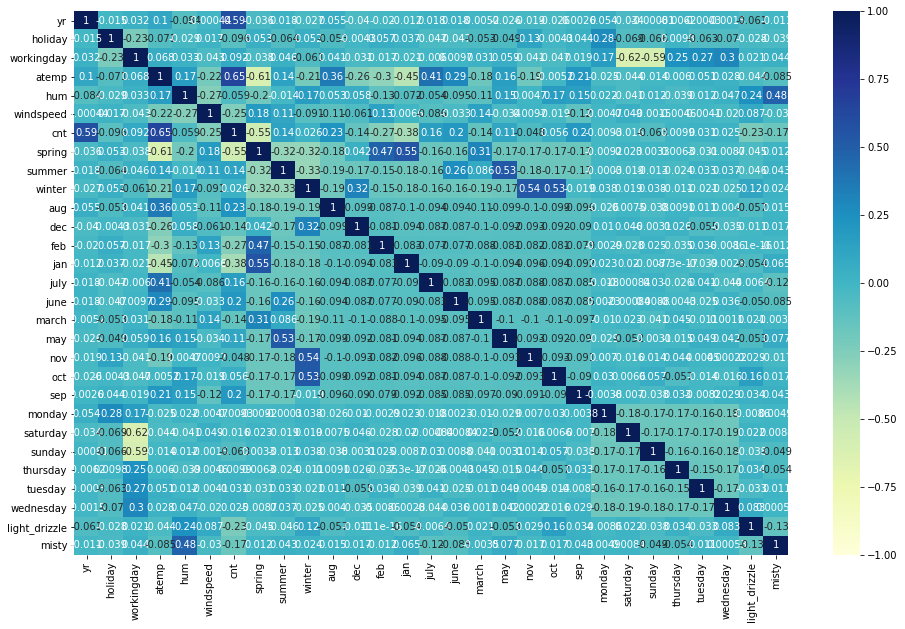

In [15]:
# Checking correlation coefficients for highly correlated coefficients
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True,vmin=-1,vmax=1,center=0, cmap="YlGnBu")
plt.show()

## Step 3: Train the model

In [16]:
# Create X and y for train data set
y_train=df_train.pop('cnt') # removes the target variable from the y_train dataset and retain the rest variables
X_train=df_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,aug,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_drizzle,misty
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4: Build the model

In [17]:
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'march', 'may', 'nov', 'oct', 'sep', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'light_drizzle', 'misty'],
      dtype='object')

### Build a model with all variables

In [18]:
#Adding all variables to the model
X_train_sm=sm.add_constant(X_train)
#create 1st model
lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
#lr_model.params

In [19]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.07e-179
Time:                        00:13:53   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2594      0.035      7.397      0.000       0.190       0.328
yr                0.2344      0.008     28.934      0.000       0.218       0.250
holiday           0.0212      0.024      0.882      0.378      -0.026       0.068
workingday        0.1004      0.012      8.176      0.000       0.076       0.124
atemp             0.4160      0.045      9.174      0.000       0.327       0.505
hum              -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed        -0.1683      0.026     -6.488      0.000      -0.219      -0.117
spring           -0.0519      0.030     -1.724      0.085      -0.111       0.007
summer            0.0348      0.026      1.327      0.185      -0.017       0.086
winter            0.1015      0.028      3.612      0.000       0.046       0.157
aug               0.0419      0.033      1.257      0.209      -0.024       0.107
dec              -0.0526      0.034     -1.560      0.120      -0.119       0.014
feb              -0.0404      0.033     -1.221      0.223      -0.105       0.025
jan              -0.0736      0.034     -2.188      0.029      -0.140      -0.007
july             -0.0147      0.035     -0.424      0.672      -0.083       0.053
june              0.0242      0.024      1.000      0.318      -0.023       0.072
march            -0.0003      0.025     -0.014      0.989      -0.049       0.048
may               0.0363      0.021      1.734      0.084      -0.005       0.077
nov              -0.0457      0.037     -1.249      0.212      -0.118       0.026
oct               0.0076      0.036      0.210      0.833      -0.063       0.079
sep               0.0957      0.032      2.984      0.003       0.033       0.159
monday           -0.0263      0.015     -1.702      0.089      -0.057       0.004
saturday          0.0961      0.014      6.934      0.000       0.069       0.123
sunday            0.0417      0.014      2.964      0.003       0.014       0.069
thursday         -0.0131      0.016     -0.835      0.404      -0.044       0.018
tuesday          -0.0214      0.016     -1.368      0.172      -0.052       0.009
wednesday        -0.0082      0.015     -0.545      0.586      -0.038       0.021
light_drizzle    -0.2530      0.027     -9.497      0.000      -0.305      -0.201
misty            -0.0612      0.010     -5.830      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     6.93e+15
================================================================

In [20]:
#VIF computation to check multicollinearity between independent variables
#check VIF for 1st model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,83.16
21,saturday,19.32
22,sunday,17.99
6,spring,10.70
8,winter,9.41
7,summer,8.20
17,nov,6.76
18,oct,6.47
9,aug,6.18
3,atemp,5.93


In [21]:
# dropping variables with high p-value and high VIF
X=X_train.drop('oct',axis=1) #(Variable 'oct' has p-value=0.833, VIF=6.47)

In [22]:
#create 2nd model excluding variable 'oct'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.05e-180
Time:                        00:13:53   Log-Likelihood:                 523.19
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     483   BIC:                            -878.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2619      0.033      7.974      0.000       0.197       0.326
yr                0.2343      0.008     28.979      0.000       0.218       0.250
holiday           0.0220      0.024      0.932      0.352      -0.024       0.068
workingday        0.1009      0.012      8.418      0.000       0.077       0.124
atemp             0.4157      0.045      9.181      0.000       0.327       0.505
hum              -0.1449      0.038     -3.767      0.000      -0.221      -0.069
windspeed        -0.1683      0.026     -6.494      0.000      -0.219      -0.117
spring           -0.0519      0.030     -1.725      0.085      -0.111       0.007
summer            0.0325      0.024      1.367      0.172      -0.014       0.079
winter            0.1044      0.024      4.267      0.000       0.056       0.152
aug               0.0384      0.029      1.327      0.185      -0.018       0.095
dec              -0.0583      0.020     -2.867      0.004      -0.098      -0.018
feb              -0.0439      0.028     -1.551      0.121      -0.100       0.012
jan              -0.0772      0.029     -2.675      0.008      -0.134      -0.020
july             -0.0181      0.031     -0.591      0.555      -0.078       0.042
june              0.0223      0.022      0.995      0.320      -0.022       0.066
march            -0.0030      0.021     -0.144      0.886      -0.045       0.038
may               0.0350      0.020      1.746      0.081      -0.004       0.074
nov              -0.0522      0.019     -2.678      0.008      -0.091      -0.014
sep               0.0915      0.025      3.652      0.000       0.042       0.141
monday           -0.0263      0.015     -1.706      0.089      -0.057       0.004
saturday          0.0967      0.014      7.126      0.000       0.070       0.123
sunday            0.0423      0.014      3.065      0.002       0.015       0.069
thursday         -0.0130      0.016     -0.833      0.405      -0.044       0.018
tuesday          -0.0214      0.016     -1.372      0.171      -0.052       0.009
wednesday        -0.0082      0.015     -0.545      0.586      -0.038       0.021
light_drizzle    -0.2529      0.027     -9.504      0.000      -0.305      -0.201
misty            -0.0612      0.010     -5.844      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.872   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.387
Skew:                          -0.782   Prob(JB):                     3.50e-56
Kurtosis:                       6.094   Cond. No.                     6.81e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of

In [23]:
#check VIF for 2nd model excluding variable 'oct'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,73.71
20,saturday,17.10
21,sunday,15.96
6,spring,10.70
8,winter,7.15
7,summer,6.75
3,atemp,5.93
9,aug,4.67
12,jan,4.30
13,july,4.25


In [24]:
# dropping variables with high p-value and high VIF
X=X.drop('summer',axis=1) #(Variable 'summer' has p-value=0.173, VIF=6.75)

In [25]:
#create 3rd model excluding variable 'summer'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.51e-181
Time:                        00:13:54   Log-Likelihood:                 522.20
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     484   BIC:                            -882.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2865      0.027     10.423      0.000       0.233       0.341
yr                0.2348      0.008     29.041      0.000       0.219       0.251
holiday           0.0276      0.023      1.187      0.236      -0.018       0.073
workingday        0.1068      0.011      9.541      0.000       0.085       0.129
atemp             0.4076      0.045      9.073      0.000       0.319       0.496
hum              -0.1433      0.038     -3.724      0.000      -0.219      -0.068
windspeed        -0.1665      0.026     -6.428      0.000      -0.217      -0.116
spring           -0.0815      0.021     -3.891      0.000      -0.123      -0.040
winter            0.0791      0.016      4.946      0.000       0.048       0.110
aug               0.0116      0.021      0.545      0.586      -0.030       0.054
dec              -0.0617      0.020     -3.059      0.002      -0.101      -0.022
feb              -0.0449      0.028     -1.585      0.114      -0.101       0.011
jan              -0.0788      0.029     -2.730      0.007      -0.135      -0.022
july             -0.0442      0.024     -1.842      0.066      -0.091       0.003
june              0.0163      0.022      0.740      0.459      -0.027       0.060
march            -0.0020      0.021     -0.095      0.924      -0.044       0.040
may               0.0397      0.020      2.005      0.046       0.001       0.079
nov              -0.0565      0.019     -2.932      0.004      -0.094      -0.019
sep               0.0696      0.019      3.606      0.000       0.032       0.108
monday           -0.0260      0.015     -1.684      0.093      -0.056       0.004
saturday          0.1036      0.013      8.220      0.000       0.079       0.128
sunday            0.0485      0.013      3.719      0.000       0.023       0.074
thursday         -0.0131      0.016     -0.835      0.404      -0.044       0.018
tuesday          -0.0208      0.016     -1.332      0.184      -0.052       0.010
wednesday        -0.0076      0.015     -0.506      0.613      -0.037       0.022
light_drizzle    -0.2553      0.027     -9.606      0.000      -0.307      -0.203
misty            -0.0611      0.010     -5.823      0.000      -0.082      -0.040
==============================================================================
Omnibus:                       86.915   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.551
Skew:                          -0.795   Prob(JB):                     1.32e-58
Kurtosis:                       6.165   Cond. No.                     7.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-29. This 

In [26]:
#check VIF for 3rd model excluding variable 'summer'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,52.06
19,saturday,11.81
20,sunday,11.28
3,atemp,5.82
6,spring,5.17
11,jan,4.29
10,feb,3.20
1,holiday,3.12
7,winter,3.05
12,july,2.60


In [27]:
# dropping variables with high p-value and low VIF
X=X.drop('aug',axis=1) #(Variable 'aug' has p-value=0.586, VIF=2.53)

In [28]:
#create 4th model excluding variable 'aug'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.69e-182
Time:                        00:13:54   Log-Likelihood:                 522.05
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     485   BIC:                            -888.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2862      0.027     10.421      0.000       0.232       0.340
yr                0.2346      0.008     29.074      0.000       0.219       0.250
holiday           0.0269      0.023      1.159      0.247      -0.019       0.073
workingday        0.1070      0.011      9.572      0.000       0.085       0.129
atemp             0.4197      0.039     10.761      0.000       0.343       0.496
hum              -0.1445      0.038     -3.764      0.000      -0.220      -0.069
windspeed        -0.1683      0.026     -6.550      0.000      -0.219      -0.118
spring           -0.0827      0.021     -3.972      0.000      -0.124      -0.042
winter            0.0756      0.015      5.162      0.000       0.047       0.104
dec              -0.0613      0.020     -3.044      0.002      -0.101      -0.022
feb              -0.0453      0.028     -1.600      0.110      -0.101       0.010
jan              -0.0784      0.029     -2.721      0.007      -0.135      -0.022
july             -0.0524      0.019     -2.824      0.005      -0.089      -0.016
june              0.0091      0.018      0.516      0.606      -0.025       0.044
march            -0.0044      0.021     -0.211      0.833      -0.045       0.036
may               0.0338      0.017      2.041      0.042       0.001       0.066
nov              -0.0559      0.019     -2.909      0.004      -0.094      -0.018
sep               0.0640      0.016      3.920      0.000       0.032       0.096
monday           -0.0262      0.015     -1.700      0.090      -0.057       0.004
saturday          0.1038      0.013      8.249      0.000       0.079       0.129
sunday            0.0484      0.013      3.717      0.000       0.023       0.074
thursday         -0.0133      0.016     -0.850      0.396      -0.044       0.017
tuesday          -0.0211      0.016     -1.349      0.178      -0.052       0.010
wednesday        -0.0078      0.015     -0.520      0.603      -0.037       0.022
light_drizzle    -0.2552      0.027     -9.609      0.000      -0.307      -0.203
misty            -0.0608      0.010     -5.807      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       86.544   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.161
Skew:                          -0.795   Prob(JB):                     1.18e-57
Kurtosis:                       6.132   Cond. No.                     7.10e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-29. This might indicate that there are
strong multicollinearity problems or that the design

In [29]:
#check VIF for 4th model excluding variable 'aug'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,52.06
18,saturday,11.81
19,sunday,11.28
6,spring,5.11
3,atemp,4.40
10,jan,4.29
9,feb,3.20
1,holiday,3.12
7,winter,2.56
13,march,2.43


In [30]:
# dropping variables with high p-value and low VIF
X=X.drop('thursday',axis=1) #(Variable 'thursday' has p-value=0.247, VIF=3.12)

In [31]:
#create 5th model excluding variable 'thursday'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     119.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.48e-183
Time:                        00:13:55   Log-Likelihood:                 521.67
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     486   BIC:                            -893.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2842      0.027     10.389      0.000       0.230       0.338
yr                0.2345      0.008     29.078      0.000       0.219       0.250
holiday           0.0228      0.023      1.005      0.315      -0.022       0.068
workingday        0.1032      0.010     10.075      0.000       0.083       0.123
atemp             0.4184      0.039     10.738      0.000       0.342       0.495
hum              -0.1447      0.038     -3.771      0.000      -0.220      -0.069
windspeed        -0.1685      0.026     -6.560      0.000      -0.219      -0.118
spring           -0.0824      0.021     -3.963      0.000      -0.123      -0.042
winter            0.0758      0.015      5.181      0.000       0.047       0.105
dec              -0.0623      0.020     -3.094      0.002      -0.102      -0.023
feb              -0.0457      0.028     -1.614      0.107      -0.101       0.010
jan              -0.0794      0.029     -2.759      0.006      -0.136      -0.023
july             -0.0518      0.019     -2.793      0.005      -0.088      -0.015
june              0.0090      0.018      0.512      0.609      -0.025       0.043
march            -0.0053      0.021     -0.256      0.798      -0.046       0.035
may               0.0337      0.017      2.039      0.042       0.001       0.066
nov              -0.0573      0.019     -2.991      0.003      -0.095      -0.020
sep               0.0636      0.016      3.896      0.000       0.032       0.096
monday           -0.0194      0.013     -1.474      0.141      -0.045       0.006
saturday          0.1068      0.012      8.838      0.000       0.083       0.131
sunday            0.0514      0.013      4.090      0.000       0.027       0.076
tuesday          -0.0143      0.013     -1.066      0.287      -0.041       0.012
wednesday        -0.0010      0.013     -0.075      0.940      -0.026       0.024
light_drizzle    -0.2564      0.027     -9.671      0.000      -0.308      -0.204
misty            -0.0601      0.010     -5.763      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       86.511   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.499
Skew:                          -0.791   Prob(JB):                     2.23e-58
Kurtosis:                       6.161   Cond. No.                     7.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
#check VIF for 5th model excluding variable 'thursday'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.05
18,saturday,11.80
19,sunday,11.26
6,spring,5.11
3,atemp,4.39
10,jan,4.28
9,feb,3.20
1,holiday,3.03
7,winter,2.56
13,march,2.42


In [33]:
# dropping variables with high p-value and low VIF
X=X.drop('march',axis=1) #(Variable 'march' has p-value=0.798, VIF=2.42)

In [34]:
#create 6th model excluding variable 'march'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.18e-184
Time:                        00:13:55   Log-Likelihood:                 521.63
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     487   BIC:                            -899.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2822      0.026     10.795      0.000       0.231       0.334
yr                0.2345      0.008     29.112      0.000       0.219       0.250
holiday           0.0225      0.023      0.993      0.321      -0.022       0.067
workingday        0.1026      0.010     10.353      0.000       0.083       0.122
atemp             0.4216      0.037     11.453      0.000       0.349       0.494
hum              -0.1450      0.038     -3.785      0.000      -0.220      -0.070
windspeed        -0.1682      0.026     -6.562      0.000      -0.219      -0.118
spring           -0.0853      0.017     -4.891      0.000      -0.120      -0.051
winter            0.0762      0.015      5.243      0.000       0.048       0.105
dec              -0.0599      0.018     -3.342      0.001      -0.095      -0.025
feb              -0.0410      0.021     -1.908      0.057      -0.083       0.001
jan              -0.0744      0.021     -3.517      0.000      -0.116      -0.033
july             -0.0517      0.019     -2.789      0.005      -0.088      -0.015
june              0.0094      0.017      0.539      0.590      -0.025       0.044
may               0.0345      0.016      2.126      0.034       0.003       0.066
nov              -0.0562      0.019     -3.014      0.003      -0.093      -0.020
sep               0.0642      0.016      3.977      0.000       0.032       0.096
monday           -0.0194      0.013     -1.476      0.141      -0.045       0.006
saturday          0.1062      0.012      8.963      0.000       0.083       0.129
sunday            0.0509      0.012      4.100      0.000       0.027       0.075
tuesday          -0.0143      0.013     -1.065      0.287      -0.041       0.012
wednesday        -0.0009      0.013     -0.072      0.943      -0.026       0.024
light_drizzle    -0.2563      0.026     -9.678      0.000      -0.308      -0.204
misty            -0.0601      0.010     -5.766      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       86.100   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.545
Skew:                          -0.790   Prob(JB):                     1.61e-57
Kurtosis:                       6.132   Cond. No.                     6.87e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [35]:
#check VIF for 6th model excluding variable 'march'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,45.20
17,saturday,10.74
18,sunday,10.38
3,atemp,3.93
6,spring,3.60
1,holiday,2.89
7,winter,2.53
10,jan,2.32
4,hum,2.01
9,feb,1.84


In [36]:
# dropping variables with high p-value and low VIF
X=X.drop('holiday',axis=1) #(Variable 'holiday' has p-value=0.321, VIF=2.89)

In [37]:
#create 7th model excluding variable 'holiday'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.18e-184
Time:                        00:13:56   Log-Likelihood:                 521.63
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     487   BIC:                            -899.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3047      0.042      7.257      0.000       0.222       0.387
yr                0.2345      0.008     29.112      0.000       0.219       0.250
workingday        0.0801      0.027      3.008      0.003       0.028       0.132
atemp             0.4216      0.037     11.453      0.000       0.349       0.494
hum              -0.1450      0.038     -3.785      0.000      -0.220      -0.070
windspeed        -0.1682      0.026     -6.562      0.000      -0.219      -0.118
spring           -0.0853      0.017     -4.891      0.000      -0.120      -0.051
winter            0.0762      0.015      5.243      0.000       0.048       0.105
dec              -0.0599      0.018     -3.342      0.001      -0.095      -0.025
feb              -0.0410      0.021     -1.908      0.057      -0.083       0.001
jan              -0.0744      0.021     -3.517      0.000      -0.116      -0.033
july             -0.0517      0.019     -2.789      0.005      -0.088      -0.015
june              0.0094      0.017      0.539      0.590      -0.025       0.044
may               0.0345      0.016      2.126      0.034       0.003       0.066
nov              -0.0562      0.019     -3.014      0.003      -0.093      -0.020
sep               0.0642      0.016      3.977      0.000       0.032       0.096
monday           -0.0194      0.013     -1.476      0.141      -0.045       0.006
saturday          0.0837      0.029      2.888      0.004       0.027       0.141
sunday            0.0284      0.029      0.975      0.330      -0.029       0.086
tuesday          -0.0143      0.013     -1.065      0.287      -0.041       0.012
wednesday        -0.0009      0.013     -0.072      0.943      -0.026       0.024
light_drizzle    -0.2563      0.026     -9.678      0.000      -0.308      -0.204
misty            -0.0601      0.010     -5.766      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       86.100   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.545
Skew:                          -0.790   Prob(JB):                     1.61e-57
Kurtosis:                       6.132   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#check VIF for 7th model excluding variable 'holiday'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.01
2,atemp,22.42
1,workingday,18.16
16,saturday,5.08
17,sunday,4.94
4,windspeed,4.65
5,spring,4.47
6,winter,3.30
9,jan,2.44
21,misty,2.33


In [39]:
# dropping variables with high p-value and low VIF
X=X.drop('wednesday',axis=1) #(Variable 'wednesday' has p-value=0.943, VIF=2.89)

In [40]:
#create 8th model excluding variable 'wednesday'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.75e-185
Time:                        00:13:56   Log-Likelihood:                 521.63
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     488   BIC:                            -906.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3045      0.042      7.272      0.000       0.222       0.387
yr                0.2345      0.008     29.143      0.000       0.219       0.250
workingday        0.0800      0.027      3.011      0.003       0.028       0.132
atemp             0.4216      0.037     11.465      0.000       0.349       0.494
hum              -0.1452      0.038     -3.796      0.000      -0.220      -0.070
windspeed        -0.1682      0.026     -6.569      0.000      -0.218      -0.118
spring           -0.0853      0.017     -4.896      0.000      -0.120      -0.051
winter            0.0762      0.015      5.248      0.000       0.048       0.105
dec              -0.0599      0.018     -3.345      0.001      -0.095      -0.025
feb              -0.0410      0.021     -1.911      0.057      -0.083       0.001
jan              -0.0744      0.021     -3.521      0.000      -0.116      -0.033
july             -0.0516      0.018     -2.791      0.005      -0.088      -0.015
june              0.0093      0.017      0.537      0.592      -0.025       0.044
may               0.0345      0.016      2.127      0.034       0.003       0.066
nov              -0.0562      0.019     -3.018      0.003      -0.093      -0.020
sep               0.0642      0.016      3.981      0.000       0.033       0.096
monday           -0.0191      0.012     -1.553      0.121      -0.043       0.005
saturday          0.0840      0.029      2.921      0.004       0.027       0.140
sunday            0.0287      0.029      0.992      0.322      -0.028       0.085
tuesday          -0.0140      0.013     -1.114      0.266      -0.039       0.011
light_drizzle    -0.2563      0.026     -9.702      0.000      -0.308      -0.204
misty            -0.0601      0.010     -5.772      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       85.957   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.064
Skew:                          -0.789   Prob(JB):                     2.04e-57
Kurtosis:                       6.130   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#check VIF for 8th model excluding variable 'wednesday'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.81
2,atemp,22.41
1,workingday,17.95
16,saturday,5.02
17,sunday,4.87
4,windspeed,4.64
5,spring,4.47
6,winter,3.30
9,jan,2.44
20,misty,2.33


In [42]:
# dropping variables with high p-value and high VIF
X=X.drop('sunday',axis=1) #(Variable 'sunday' has p-value=0.322, VIF=4.87)

In [43]:
#create 9th model excluding variable 'sunday'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.77e-186
Time:                        00:13:56   Log-Likelihood:                 521.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     489   BIC:                            -911.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3297      0.033      9.890      0.000       0.264       0.395
yr                0.2348      0.008     29.197      0.000       0.219       0.251
workingday        0.0561      0.011      4.999      0.000       0.034       0.078
atemp             0.4198      0.037     11.430      0.000       0.348       0.492
hum              -0.1438      0.038     -3.762      0.000      -0.219      -0.069
windspeed        -0.1683      0.026     -6.573      0.000      -0.219      -0.118
spring           -0.0857      0.017     -4.919      0.000      -0.120      -0.051
winter            0.0767      0.015      5.287      0.000       0.048       0.105
dec              -0.0607      0.018     -3.397      0.001      -0.096      -0.026
feb              -0.0419      0.021     -1.956      0.051      -0.084       0.000
jan              -0.0753      0.021     -3.566      0.000      -0.117      -0.034
july             -0.0507      0.018     -2.742      0.006      -0.087      -0.014
june              0.0101      0.017      0.581      0.562      -0.024       0.044
may               0.0347      0.016      2.141      0.033       0.003       0.067
nov              -0.0587      0.018     -3.184      0.002      -0.095      -0.022
sep               0.0631      0.016      3.923      0.000       0.031       0.095
monday           -0.0232      0.012     -2.005      0.046      -0.046      -0.000
saturday          0.0591      0.014      4.203      0.000       0.031       0.087
tuesday          -0.0150      0.012     -1.197      0.232      -0.040       0.010
light_drizzle    -0.2565      0.026     -9.710      0.000      -0.308      -0.205
misty            -0.0601      0.010     -5.772      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       90.332   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.945
Skew:                          -0.821   Prob(JB):                     9.85e-62
Kurtosis:                       6.244   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#check VIF for 9th model excluding variable 'sunday'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.78
2,atemp,20.77
1,workingday,5.03
5,spring,4.34
4,windspeed,4.13
6,winter,3.23
9,jan,2.42
19,misty,2.28
0,yr,2.09
8,feb,1.93


In [45]:
# dropping variables with high p-value and low VIF
X=X.drop('tuesday',axis=1) #(Variable 'tuesday' has p-value=0.562, VIF=1.49)

In [46]:
#create 10th model excluding variable 'tuesday'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.30e-187
Time:                        00:13:57   Log-Likelihood:                 520.37
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3303      0.033      9.907      0.000       0.265       0.396
yr                0.2348      0.008     29.185      0.000       0.219       0.251
workingday        0.0528      0.011      4.851      0.000       0.031       0.074
atemp             0.4196      0.037     11.421      0.000       0.347       0.492
hum              -0.1450      0.038     -3.794      0.000      -0.220      -0.070
windspeed        -0.1689      0.026     -6.597      0.000      -0.219      -0.119
spring           -0.0853      0.017     -4.895      0.000      -0.120      -0.051
winter            0.0765      0.015      5.266      0.000       0.048       0.105
dec              -0.0600      0.018     -3.354      0.001      -0.095      -0.025
feb              -0.0431      0.021     -2.014      0.045      -0.085      -0.001
jan              -0.0753      0.021     -3.565      0.000      -0.117      -0.034
july             -0.0513      0.018     -2.777      0.006      -0.088      -0.015
june              0.0106      0.017      0.610      0.542      -0.024       0.045
may               0.0344      0.016      2.123      0.034       0.003       0.066
nov              -0.0587      0.018     -3.185      0.002      -0.095      -0.023
sep               0.0634      0.016      3.942      0.000       0.032       0.095
monday           -0.0201      0.011     -1.782      0.075      -0.042       0.002
saturday          0.0593      0.014      4.215      0.000       0.032       0.087
light_drizzle    -0.2548      0.026     -9.654      0.000      -0.307      -0.203
misty            -0.0598      0.010     -5.748      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       90.886   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.059
Skew:                          -0.817   Prob(JB):                     6.27e-64
Kurtosis:                       6.321   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#check VIF for 10th model excluding variable 'tuesday'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.77
2,atemp,20.77
1,workingday,4.73
5,spring,4.34
4,windspeed,4.13
6,winter,3.23
9,jan,2.42
18,misty,2.28
0,yr,2.09
8,feb,1.92


In [48]:
# dropping variables with high p-value and low VIF
X=X.drop('june',axis=1) #(Variable 'june' has p-value=0.542, VIF=1.49)

In [49]:
#create 11th model excluding variable 'june'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.04e-188
Time:                        00:13:57   Log-Likelihood:                 520.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -921.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3310      0.033      9.937      0.000       0.266       0.396
yr                0.2345      0.008     29.218      0.000       0.219       0.250
workingday        0.0527      0.011      4.842      0.000       0.031       0.074
atemp             0.4262      0.035     12.141      0.000       0.357       0.495
hum              -0.1476      0.038     -3.890      0.000      -0.222      -0.073
windspeed        -0.1693      0.026     -6.619      0.000      -0.220      -0.119
spring           -0.0867      0.017     -5.016      0.000      -0.121      -0.053
winter            0.0750      0.014      5.241      0.000       0.047       0.103
dec              -0.0592      0.018     -3.322      0.001      -0.094      -0.024
feb              -0.0423      0.021     -1.982      0.048      -0.084      -0.000
jan              -0.0740      0.021     -3.524      0.000      -0.115      -0.033
july             -0.0553      0.017     -3.206      0.001      -0.089      -0.021
may               0.0319      0.016      2.035      0.042       0.001       0.063
nov              -0.0584      0.018     -3.169      0.002      -0.095      -0.022
sep               0.0610      0.016      3.916      0.000       0.030       0.092
monday           -0.0200      0.011     -1.775      0.077      -0.042       0.002
saturday          0.0592      0.014      4.213      0.000       0.032       0.087
light_drizzle    -0.2544      0.026     -9.648      0.000      -0.306      -0.203
misty            -0.0598      0.010     -5.746      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       89.780   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.886
Skew:                          -0.810   Prob(JB):                     1.37e-62
Kurtosis:                       6.284   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#check VIF 11th model excluding variable 'june'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.40
2,atemp,18.23
1,workingday,4.72
5,spring,4.27
4,windspeed,4.13
6,winter,3.14
9,jan,2.39
17,misty,2.28
0,yr,2.08
8,feb,1.91


In [51]:
# dropping variables with high p-value and low VIF
X=X.drop('monday',axis=1) #(Variable 'monday' has p-value=0.077, VIF=1.24)

In [52]:
#create 12th model excluding variable 'monday'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.23e-188
Time:                        00:13:57   Log-Likelihood:                 518.55
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3295      0.033      9.874      0.000       0.264       0.395
yr                0.2337      0.008     29.101      0.000       0.218       0.250
workingday        0.0510      0.011      4.696      0.000       0.030       0.072
atemp             0.4283      0.035     12.180      0.000       0.359       0.497
hum              -0.1501      0.038     -3.948      0.000      -0.225      -0.075
windspeed        -0.1700      0.026     -6.633      0.000      -0.220      -0.120
spring           -0.0856      0.017     -4.949      0.000      -0.120      -0.052
winter            0.0744      0.014      5.195      0.000       0.046       0.103
dec              -0.0590      0.018     -3.305      0.001      -0.094      -0.024
feb              -0.0427      0.021     -1.994      0.047      -0.085      -0.001
jan              -0.0749      0.021     -3.561      0.000      -0.116      -0.034
july             -0.0553      0.017     -3.196      0.001      -0.089      -0.021
may               0.0330      0.016      2.101      0.036       0.002       0.064
nov              -0.0576      0.018     -3.123      0.002      -0.094      -0.021
sep               0.0613      0.016      3.925      0.000       0.031       0.092
saturday          0.0615      0.014      4.381      0.000       0.034       0.089
light_drizzle    -0.2531      0.026     -9.582      0.000      -0.305      -0.201
misty            -0.0593      0.010     -5.692      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       89.632   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.827
Skew:                          -0.803   Prob(JB):                     1.91e-63
Kurtosis:                       6.318   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#check VIF 12th model excluding variable 'monday'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,27.29
2,atemp,18.22
1,workingday,4.68
5,spring,4.27
4,windspeed,4.12
6,winter,3.13
9,jan,2.38
16,misty,2.27
0,yr,2.07
8,feb,1.91


In [54]:
# dropping variables with low p-value and high VIF
X=X.drop('hum',axis=1) #(Variable 'hum' has p-value=0, VIF=27.29)

In [55]:
#create 13th model excluding variable 'hum'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.52e-186
Time:                        00:13:58   Log-Likelihood:                 510.59
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     493   BIC:                            -915.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2529      0.028      9.180      0.000       0.199       0.307
yr                0.2371      0.008     29.267      0.000       0.221       0.253
workingday        0.0538      0.011      4.888      0.000       0.032       0.075
atemp             0.3926      0.034     11.386      0.000       0.325       0.460
windspeed        -0.1452      0.025     -5.758      0.000      -0.195      -0.096
spring           -0.0897      0.018     -5.117      0.000      -0.124      -0.055
winter            0.0640      0.014      4.481      0.000       0.036       0.092
dec              -0.0654      0.018     -3.623      0.000      -0.101      -0.030
feb              -0.0442      0.022     -2.038      0.042      -0.087      -0.002
jan              -0.0813      0.021     -3.817      0.000      -0.123      -0.039
july             -0.0495      0.017     -2.831      0.005      -0.084      -0.015
may               0.0232      0.016      1.476      0.140      -0.008       0.054
nov              -0.0574      0.019     -3.065      0.002      -0.094      -0.021
sep               0.0561      0.016      3.558      0.000       0.025       0.087
saturday          0.0657      0.014      4.631      0.000       0.038       0.094
light_drizzle    -0.2957      0.024    -12.088      0.000      -0.344      -0.248
misty            -0.0830      0.009     -9.587      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       92.326   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.547
Skew:                          -0.836   Prob(JB):                     8.10e-64
Kurtosis:                       6.298   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#check VIF 13th model excluding variable 'hum'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.99
1,workingday,4.59
3,windspeed,4.10
4,spring,3.89
5,winter,2.70
8,jan,2.22
0,yr,2.07
7,feb,1.88
13,saturday,1.82
11,nov,1.80


In [57]:
# dropping variables with low p-value and high VIF
X=X.drop('atemp',axis=1) #(Variable 'atemp' has p-value=0, VIF=6.99)

In [58]:
#create 14th model excluding variable 'atemp'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     132.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.08e-162
Time:                        00:13:58   Log-Likelihood:                 451.06
No. Observations:                 510   AIC:                            -870.1
Df Residuals:                     494   BIC:                            -802.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5142      0.017     30.076      0.000       0.481       0.548
yr                0.2469      0.009     27.297      0.000       0.229       0.265
workingday        0.0552      0.012      4.472      0.000       0.031       0.079
windspeed        -0.2049      0.028     -7.399      0.000      -0.259      -0.150
spring           -0.1662      0.018     -9.146      0.000      -0.202      -0.131
winter            0.0199      0.015      1.291      0.197      -0.010       0.050
dec              -0.1278      0.019     -6.620      0.000      -0.166      -0.090
feb              -0.0991      0.024     -4.172      0.000      -0.146      -0.052
jan              -0.1681      0.022     -7.533      0.000      -0.212      -0.124
july              0.0203      0.018      1.103      0.271      -0.016       0.056
may               0.0237      0.018      1.344      0.180      -0.011       0.058
nov              -0.1061      0.020     -5.185      0.000      -0.146      -0.066
sep               0.0773      0.018      4.392      0.000       0.043       0.112
saturday          0.0640      0.016      4.018      0.000       0.033       0.095
light_drizzle    -0.3160      0.027    -11.539      0.000      -0.370      -0.262
misty            -0.0905      0.010     -9.340      0.000      -0.110      -0.071
==============================================================================
Omnibus:                       83.842   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.681
Skew:                          -0.844   Prob(JB):                     5.91e-45
Kurtosis:                       5.595   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#check VIF 14th model excluding variable 'atemp'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,3.86
2,windspeed,3.56
1,workingday,3.31
4,winter,2.68
7,jan,2.17
0,yr,1.88
6,feb,1.86
10,nov,1.79
12,saturday,1.57
14,misty,1.57


In [60]:
# dropping variables with high p-value and low VIF
X=X.drop('may',axis=1) #(Variable 'atemp' has p-value=0.180, VIF=1.22)

In [61]:
#create 15th model excluding variable 'may'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     142.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.19e-163
Time:                        00:13:58   Log-Likelihood:                 450.13
No. Observations:                 510   AIC:                            -870.3
Df Residuals:                     495   BIC:                            -806.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5200      0.017     31.398      0.000       0.487       0.553
yr                0.2463      0.009     27.242      0.000       0.229       0.264
workingday        0.0553      0.012      4.471      0.000       0.031       0.080
windspeed        -0.2064      0.028     -7.453      0.000      -0.261      -0.152
spring           -0.1711      0.018     -9.597      0.000      -0.206      -0.136
winter            0.0154      0.015      1.019      0.309      -0.014       0.045
dec              -0.1285      0.019     -6.650      0.000      -0.166      -0.091
feb              -0.0994      0.024     -4.180      0.000      -0.146      -0.053
jan              -0.1686      0.022     -7.549      0.000      -0.212      -0.125
july              0.0152      0.018      0.843      0.400      -0.020       0.051
nov              -0.1068      0.020     -5.213      0.000      -0.147      -0.067
sep               0.0729      0.017      4.213      0.000       0.039       0.107
saturday          0.0633      0.016      3.974      0.000       0.032       0.095
light_drizzle    -0.3167      0.027    -11.557      0.000      -0.371      -0.263
misty            -0.0895      0.010     -9.259      0.000      -0.109      -0.071
==============================================================================
Omnibus:                       84.477   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.256
Skew:                          -0.857   Prob(JB):                     1.99e-44
Kurtosis:                       5.556   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#check VIF 15th model excluding variable 'may'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,3.76
2,windspeed,3.51
1,workingday,3.19
4,winter,2.61
7,jan,2.17
0,yr,1.88
6,feb,1.86
9,nov,1.79
11,saturday,1.56
5,dec,1.55


In [63]:
# dropping variables with high p-value and low VIF
X=X.drop('july',axis=1) #(Variable 'atemp' has p-value=0.4, VIF=1.14)

In [64]:
#create 16th model excluding variable 'july'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.73e-164
Time:                        00:13:59   Log-Likelihood:                 449.76
No. Observations:                 510   AIC:                            -871.5
Df Residuals:                     496   BIC:                            -812.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5236      0.016     32.762      0.000       0.492       0.555
yr                0.2463      0.009     27.251      0.000       0.229       0.264
workingday        0.0550      0.012      4.451      0.000       0.031       0.079
windspeed        -0.2084      0.028     -7.558      0.000      -0.263      -0.154
spring           -0.1734      0.018     -9.846      0.000      -0.208      -0.139
winter            0.0131      0.015      0.885      0.377      -0.016       0.042
dec              -0.1288      0.019     -6.668      0.000      -0.167      -0.091
feb              -0.0995      0.024     -4.184      0.000      -0.146      -0.053
jan              -0.1687      0.022     -7.556      0.000      -0.213      -0.125
nov              -0.1071      0.020     -5.230      0.000      -0.147      -0.067
sep               0.0708      0.017      4.136      0.000       0.037       0.104
saturday          0.0633      0.016      3.971      0.000       0.032       0.095
light_drizzle    -0.3165      0.027    -11.552      0.000      -0.370      -0.263
misty            -0.0904      0.010     -9.401      0.000      -0.109      -0.072
==============================================================================
Omnibus:                       84.833   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.420
Skew:                          -0.860   Prob(JB):                     1.11e-44
Kurtosis:                       5.563   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#check VIF 16th model excluding variable 'july'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,3.70
2,windspeed,3.50
1,workingday,3.09
4,winter,2.58
7,jan,2.17
0,yr,1.87
6,feb,1.86
8,nov,1.79
5,dec,1.55
12,misty,1.54


In [66]:
# dropping variables with high p-value and low VIF
X=X.drop('winter',axis=1) #(Variable 'atemp' has p-value=0.377, VIF=2.58)

In [67]:
#create 17th model excluding variable 'winter'
X_train_sm=sm.add_constant(X)

lr=sm.OLS(y_train,X_train_sm)

#fit the model
lr_model=lr.fit()

#parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     165.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.30e-165
Time:                        00:13:59   Log-Likelihood:                 449.36
No. Observations:                 510   AIC:                            -872.7
Df Residuals:                     497   BIC:                            -817.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5265      0.016     33.663      0.000       0.496       0.557
yr                0.2463      0.009     27.254      0.000       0.229       0.264
workingday        0.0544      0.012      4.410      0.000       0.030       0.079
windspeed        -0.2094      0.028     -7.602      0.000      -0.264      -0.155
spring           -0.1780      0.017    -10.581      0.000      -0.211      -0.145
dec              -0.1207      0.017     -7.105      0.000      -0.154      -0.087
feb              -0.0972      0.024     -4.113      0.000      -0.144      -0.051
jan              -0.1664      0.022     -7.506      0.000      -0.210      -0.123
nov              -0.0964      0.017     -5.829      0.000      -0.129      -0.064
sep               0.0712      0.017      4.159      0.000       0.038       0.105
saturday          0.0630      0.016      3.958      0.000       0.032       0.094
light_drizzle    -0.3130      0.027    -11.546      0.000      -0.366      -0.260
misty            -0.0899      0.010     -9.369      0.000      -0.109      -0.071
==============================================================================
Omnibus:                       81.215   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.997
Skew:                          -0.840   Prob(JB):                     4.09e-41
Kurtosis:                       5.435   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#check VIF 17th model excluding variable 'winter'
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.47
3,spring,3.40
1,workingday,3.06
6,jan,2.13
0,yr,1.86
5,feb,1.83
11,misty,1.53
9,saturday,1.52
4,dec,1.17
7,nov,1.13


## Step5: Residual Analysis of the train data

In [69]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.771762
426    0.514451
728    0.335326
482    0.706425
111    0.411164
         ...   
578    0.788001
53     0.282432
350    0.288516
79     0.379982
520    0.661937
Length: 510, dtype: float64

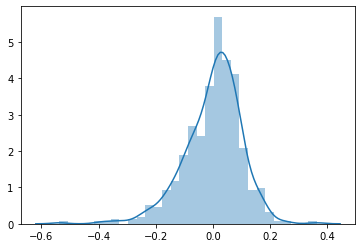

In [70]:
#Distribution of residual terms
residual=y_train-y_train_pred
sns.distplot(residual)

## Step6: Model Evaluation & Predictions about the Test Set

In [71]:
# Create a list of numeric vars
num_vars=['atemp','hum','windspeed','cnt']
# Fit the scale on the data
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_drizzle,misty
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [72]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_drizzle,misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Predictions

In [73]:
y_test=df_test.pop('cnt')
X_test=df_test

In [74]:
# add a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,monday,saturday,sunday,thursday,tuesday,wednesday,light_drizzle,misty
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
X_test_sm=X_test_sm.drop(['oct','summer','aug','thursday','march','holiday','wednesday','sunday','tuesday','june','monday','hum','atemp','may','july','winter'],axis=1)

In [76]:
#predict
y_test_pred=lr_model.predict(X_test_sm)

In [77]:
# model evaluation
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7847698072951167

### Comparing R-Squared for train data and test data
    R-Squared for the train data set = 0.80
    R-Squared for the test data set = 0.78

Text(0, 0.5, 'y_pred')

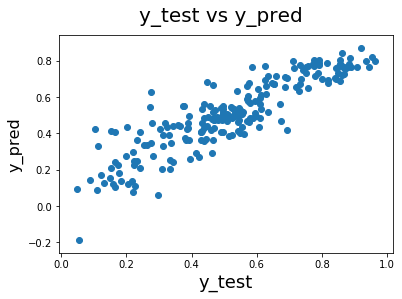

In [78]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# The line of best fit states the demand for shared bikes is affected by the following equation:

## cnt= 0.247*yr+0.055*workingday-0.21*windspeed-0.178*spring-0.121*dec-0.098*feb-0.167*jan-0.097*nov+0.072*sep+0.063*saturday-0.313*light_drizzle-0.09*misty

### End of Coding